In [1]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
from tqdm import tqdm
import pandas as pd
import os
import stats
from torch.utils.data import TensorDataset, DataLoader
import dataset

/home/emeric/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [168]:
root_path = "/media/emeric/SSD1/emericssd/online_results/models"

category = os.listdir(root_path)[5]
category_path = os.path.join(root_path, category)

for video in os.listdir(category_path):
    path = os.path.join(category_path, video)
    path = os.path.join(path, "perf.csv")
    print(path)

    if os.path.exists(path):
        df = pd.read_csv(path)
        aene = df['fm_aene']
        online = df['fm_online']

        plt.plot(aene)
        plt.plot(online)
        plt.show()
        print("aene", np.nanmean(aene))
        print("online", np.nanmean(online))
        print(np.nanmean(online[aene != 0] / aene[aene != 0]))

/media/emeric/SSD1/emericssd/online_results/models/turbulence/turbulence0/perf.csv


In [191]:
root_path = "/media/emeric/SSD1/emericssd/online_results/models"

category = os.listdir(root_path)
for category in os.listdir(root_path):
    category_path = os.path.join(root_path, category)
    for video in os.listdir(category_path):
        path = os.path.join(category_path, video)
        path = os.path.join(path, "perf.csv")

        if os.path.exists(path):
            df = pd.read_csv(path)
            aene = df['fm_aene']
            online = df['fm_online']
            mean = np.nanmean(online[aene != 0] / aene[aene != 0])
            print(f"{category:<30}{video:<20}{mean:<30.4f}")
        else:
            print(f"{category:<30}{video:<20} not available")

cameraJitter                  boulevard           0.9767                        
cameraJitter                  traffic             0.9733                        
cameraJitter                  sidewalk            1.0139                        
cameraJitter                  badminton           0.9944                        
intermittentObjectMotion      parking             0.8590                        
intermittentObjectMotion      sofa                1.0479                        
intermittentObjectMotion      tramstop            1.3280                        
intermittentObjectMotion      winterDriveway      0.5693                        
intermittentObjectMotion      abandonedBox        0.5376                        
intermittentObjectMotion      streetLight         0.5259                        
thermal                       diningRoom          0.8920                        
thermal                       lakeSide            0.8536                        
thermal                     

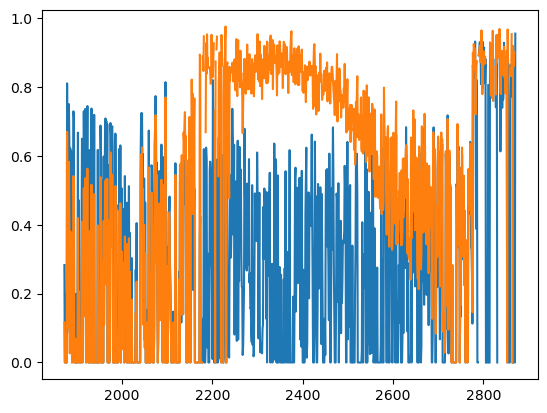

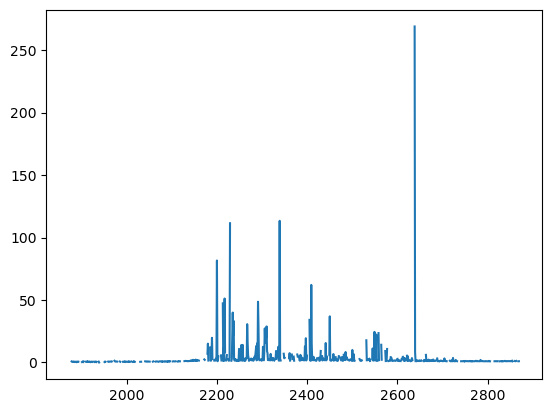

0.29844688883518344
0.5341504633380428
3873 3873
inf


In [185]:
path = "/media/emeric/SSD1/emericssd/online_results/models/lowFramerate/tunnelExit_0_35fps/perf.csv"
roi = 0 #300 - 128 + 1
aene =  df['fm_aene'][roi:]
online = df['fm_online'][roi:]
ratio = online / aene
df = pd.read_csv(path)
plt.plot(aene)
plt.plot(online)
plt.show()
plt.plot(ratio)
plt.show()
print(aene.mean())
print(online.mean())
print(len(aene), len(online))
print(ratio.mean())

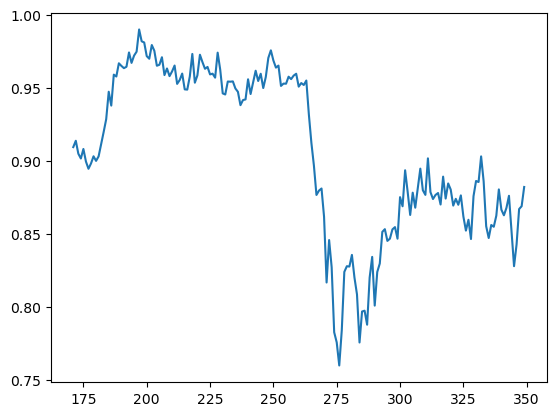

In [130]:
df['fm_online'][:350].plot()

In [3]:


batch_size = 3
buffer_size = 9


my_x = np.array([[10*i] for i in range(100)])

tensor_x = torch.Tensor(my_x)

my_dataset = TensorDataset(tensor_x)
my_dataloader = DataLoader(my_dataset, batch_sampler=dataset.StreamSamplerRandomWeighted(batch_size, buffer_size))


for image in range(buffer_size-1, buffer_size + 6):
    my_dataloader.batch_sampler.position(image)
    print("image", image+1)
    print(my_dataloader.batch_sampler.batch_list)
    for epoch in range(2):
        #print("epoch", epoch)
        for batch in my_dataloader:
            pass #print(batch)

image 9
[[6 2 5]
 [4 0 8]
 [3 7 1]]
image 10
[[5 8 9]
 [2 4 6]
 [7 3 1]]
image 11
[[ 3  7  9]
 [ 8 10  5]
 [ 2  6  1]]
image 12
[[ 8  9  5]
 [ 1 11 10]
 [ 7  3  4]]
image 13
[[ 3 11  5]
 [10  4 12]
 [ 1  7  9]]
image 14
[[10 12 13]
 [ 7  4 11]
 [ 5  2  8]]
image 15
[[ 7  9 13]
 [ 2  8  6]
 [ 4  3 11]]


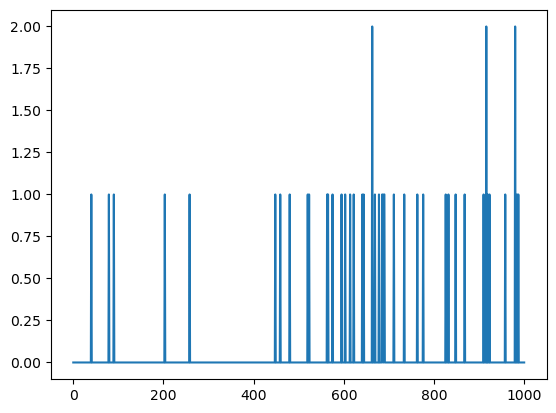

In [149]:
pos = 1000
dic = {}

for i in range(pos+1):
    dic[i] = 0

for image in range(5):
    my_dataloader.batch_sampler.position(pos)
    lst = my_dataloader.batch_sampler.batch_list
    unique, counts = np.unique(lst, return_counts=True)
    for val in unique:
        dic[val] += 1

lists = sorted(dic.items())
x, y = zip(*lists)

plt.plot(x, y)
plt.show()